<a href="https://colab.research.google.com/github/aliroshandel98/Pytorch/blob/main/04_Pytorch_Custom_Datasets_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hello everyone

we're going to complete exercises from the custom datasets section.


link: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb



#1.Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

First way to decrease underfitting for a model is to increase the number of hidden layers/units in model so the model have more units to predict more accurately.

another way for dealing with underfitting problem is to decrease the learning rate,because the high value for learning rate could cause to divergence.

Train the model for lopnger time is another way to decrease the underfitting of model because it gives some more time for weights to adapt.

#2.Recreate the data loading functions we built in sections 1, 2, 3 and 4. You should have train and test DataLoader's ready to use.

Well we first need to import needed libraries to start!

In [1]:
import torch
import matplotlib.pyplot as plt
import pathlib
import zipfile
import requests
from pathlib import Path
import os
from torch import nn

Then we should crate a folder so that our data can be stored.

After that we can download dat and put that in our folder.

In [2]:
data_path = Path('data/')
image_Path = data_path / "pizza_steak_sushi"

if image_Path.is_dir():
  print(f'{image_Path} is exist')
else:
  print(f"dont find{image_Path} wer'e creating one for you")
  image_Path.mkdir(parents=True, exist_ok=True)


with open(data_path / "pizza_steak_sushi.zip", 'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print(f"downloading content...")
  f.write(request.content)

  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", 'r') as zip_ref:
    print('unzipping...')
    zip_ref.extractall(image_Path)

dont finddata/pizza_steak_sushi wer'e creating one for you
downloading content...
unzipping...


Now we can see what we have and then visualize our data.

In [3]:
def walk_through(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there is {len(dirnames)} directories and {len(filenames)} images in {dir_path}")

In [4]:
walk_through(data_path)

there is 1 directories and 1 images in data
there is 2 directories and 0 images in data
there is 3 directories and 0 images in data
there is 0 directories and 75 images in data
there is 0 directories and 72 images in data
there is 0 directories and 78 images in data
there is 3 directories and 0 images in data
there is 0 directories and 19 images in data
there is 0 directories and 31 images in data
there is 0 directories and 25 images in data


image path:data/pizza_steak_sushi/train/steak/355715.jpg
image class: steak


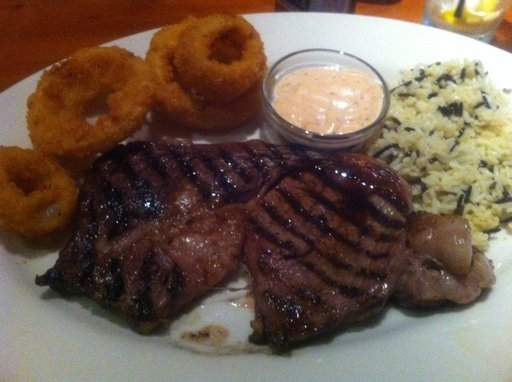

In [5]:
#Visualizing it

import random
from PIL import Image

random.seed(42)
image_path_list = list(image_Path.glob('*/*/*.jpg'))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"image path:{random_image_path}")
print(f"image class: {image_class}")

img

Now that we have our data, we need to convert our data into Tensors

In [6]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [7]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

Now that we have the images in our wanted format we should make it the way that can be used as iterative eries of images so we can pass it to our model.

We can use ImageFolder pre built function to do this.

In [8]:
train_dir = image_Path / "train"
test_dir = image_Path / "test"
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

## now we should turn them into dataloaders

In [9]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=1,
                             shuffle=True)

#3.Recreate model_0 we built in section 7.


## we created TinyVGG so then i will recreate that

## it has two blocks and in each it has Conv2d --> ReLU --> Conv2d --> Relu --> MaPool2d

## Lets Create that

In [10]:
class TinyVGG(nn.Module):
  def __init__(self, input, output, hidden):
    super().__init__()
    self.Block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input, out_channels=hidden, kernel_size=2, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden, out_channels=hidden, kernel_size=2, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.Block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden, out_channels=hidden, kernel_size=2, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden, out_channels=hidden, kernel_size=2, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Flatten(),
        nn.Linear(in_features=hidden*14*14, out_features=output)
    )

  def forward(self, x:torch.Tensor):
    return self.Block_2(self.Block_1(x))

##creating class names which are pizza steak and sushi

In [11]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

##now we should make a model with TinyVGG class

##it should have 3 inputs as we are using images with color,3 outputs which are pizza steak and sushi and any hidden layers.

In [12]:
model_0 = TinyVGG(input=3, output=len(class_names), hidden=20)
model_0

TinyVGG(
  (Block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=3920, out_features=3, bias=True)
  )
)

##here i use a dummy tensor to test my model.

In [13]:
dummy_tensor = torch.rand(32, 3, 64, 64)
model_0(dummy_tensor)

tensor([[-0.0364,  0.0351, -0.0271],
        [-0.0318,  0.0312, -0.0279],
        [-0.0359,  0.0325, -0.0265],
        [-0.0387,  0.0329, -0.0293],
        [-0.0371,  0.0390, -0.0297],
        [-0.0340,  0.0333, -0.0324],
        [-0.0391,  0.0377, -0.0291],
        [-0.0368,  0.0380, -0.0267],
        [-0.0389,  0.0378, -0.0271],
        [-0.0381,  0.0360, -0.0313],
        [-0.0387,  0.0342, -0.0269],
        [-0.0357,  0.0396, -0.0302],
        [-0.0367,  0.0364, -0.0302],
        [-0.0397,  0.0351, -0.0306],
        [-0.0358,  0.0346, -0.0309],
        [-0.0357,  0.0387, -0.0236],
        [-0.0391,  0.0323, -0.0272],
        [-0.0390,  0.0366, -0.0242],
        [-0.0355,  0.0377, -0.0264],
        [-0.0373,  0.0382, -0.0296],
        [-0.0403,  0.0345, -0.0305],
        [-0.0358,  0.0364, -0.0312],
        [-0.0356,  0.0333, -0.0267],
        [-0.0377,  0.0349, -0.0301],
        [-0.0352,  0.0342, -0.0300],
        [-0.0418,  0.0401, -0.0284],
        [-0.0393,  0.0337, -0.0261],
 

#4.Create training and testing functions for model_0.

##we create functions that take dataloaders and loss functions  and optimizer and epochs then loop for training and another one without epoch for test
##I will use ``` torch.optim.SGD()``` as optimizer and ```nn.CrossEntropyLoss()``` as loss function.



In [14]:
def train_func(train_dataloader,
               model,
               loss_func,
               optimizer,
               epochs):
  model.train()
  for epoch in range(epochs):
    loss_str = 0
    for batch, (x, y) in enumerate(train_dataloader):
      y_logits = model(x)
      loss = loss_func(y_logits, y)
      loss_str += loss
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    loss_str /= len(train_dataloader)
    print(f"loss: {loss_str}")

In [15]:
train_func(train_dataloader=train_dataloader,
           model=model_0,
           loss_func=nn.CrossEntropyLoss(),
           optimizer=torch.optim.NAdam(lr=0.01, params=model_0.parameters()),
           epochs=10)

loss: 1.1802316904067993
loss: 1.1042842864990234
loss: 1.1026486158370972
loss: 1.1043559312820435
loss: 1.103531002998352
loss: 1.1033105850219727
loss: 1.1038706302642822
loss: 1.1034706830978394
loss: 1.1037979125976562
loss: 1.1043847799301147


In [16]:
def test_func(test_dataloader,
              model,
              loss_func):
  with torch.inference_mode():
    loss_str = 0
    for batch,(x,y) in enumerate(test_dataloader):
      y_logits = model(x)
      loss = loss_func(y_logits, y)
      loss_str += loss
    loss_str /= len(test_dataloader)
    print(f"loss: {loss_str}")



In [17]:
test_func(test_dataloader=test_dataloader,
          model=model_0,
          loss_func=nn.CrossEntropyLoss())

loss: 1.1018803119659424


#5.Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
#Use torch.optim.Adam() with a learning rate of 0.001 as the optimizer.

##here is with 5

In [18]:
train_func(train_dataloader=train_dataloader,
           model=model_0,
           loss_func=nn.CrossEntropyLoss(),
           optimizer=torch.optim.Adam(lr=0.001, params=model_0.parameters()),
           epochs=5)

loss: 1.098936915397644
loss: 1.0986740589141846
loss: 1.098880648612976
loss: 1.0986906290054321
loss: 1.0987374782562256


##it didn't change too much.

In [19]:
train_func(train_dataloader=train_dataloader,
           model=model_0,
           loss_func=nn.CrossEntropyLoss(),
           optimizer=torch.optim.NAdam(lr=0.01, params=model_0.parameters()),
           epochs=20)

loss: 1.1034307479858398
loss: 1.1019783020019531
loss: 1.1041533946990967
loss: 1.1034438610076904
loss: 1.1046208143234253
loss: 1.1036161184310913
loss: 1.1011545658111572
loss: 1.1045057773590088
loss: 1.1049138307571411
loss: 1.1039990186691284
loss: 1.104043960571289
loss: 1.104117512702942
loss: 1.1035858392715454
loss: 1.1029260158538818
loss: 1.102449893951416
loss: 1.1053624153137207
loss: 1.1028308868408203
loss: 1.103262186050415
loss: 1.1051205396652222
loss: 1.1042630672454834


In [20]:
train_func(train_dataloader=train_dataloader,
           model=model_0,
           loss_func=nn.CrossEntropyLoss(),
           optimizer=torch.optim.NAdam(lr=0.01, params=model_0.parameters()),
           epochs=50)

loss: 1.1035966873168945
loss: 1.1042202711105347
loss: 1.1048455238342285
loss: 1.103730320930481
loss: 1.1040852069854736
loss: 1.1046925783157349
loss: 1.1028685569763184
loss: 1.1057616472244263
loss: 1.103259563446045
loss: 1.1035704612731934
loss: 1.10489821434021
loss: 1.1031988859176636
loss: 1.1030857563018799
loss: 1.1041098833084106
loss: 1.1037712097167969
loss: 1.102544903755188
loss: 1.1004679203033447
loss: 1.1033520698547363
loss: 1.1052660942077637
loss: 1.1029709577560425
loss: 1.1040215492248535
loss: 1.104452133178711
loss: 1.103545069694519
loss: 1.1032122373580933
loss: 1.1039314270019531
loss: 1.1032888889312744
loss: 1.1034177541732788
loss: 1.1011029481887817
loss: 1.1049416065216064
loss: 1.104507565498352
loss: 1.1029729843139648
loss: 1.1025446653366089
loss: 1.1025861501693726
loss: 1.1039085388183594
loss: 1.1030133962631226
loss: 1.1017664670944214
loss: 1.1033905744552612
loss: 1.1011989116668701
loss: 1.1060994863510132
loss: 1.1026184558868408
loss: 1.

##OK we can see even with 50 epochs there is no change.

#6.Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [21]:
model_2 = TinyVGG(input=3, output=len(class_names), hidden=40)

In [22]:
train_func(model=model_2,
           train_dataloader=train_dataloader,
           loss_func=nn.CrossEntropyLoss(),
           optimizer=torch.optim.Adam(lr=0.001, params=model_2.parameters()),
           epochs=20)

loss: 1.1004043817520142
loss: 0.9968854188919067
loss: 0.9012486338615417
loss: 0.8667173385620117
loss: 0.8509668111801147
loss: 0.7963444590568542
loss: 0.7576587200164795
loss: 0.7357262969017029
loss: 0.7032036185264587
loss: 0.6240919232368469
loss: 0.5682719945907593
loss: 0.47083553671836853
loss: 0.4379875957965851
loss: 0.32372692227363586
loss: 0.3309621810913086
loss: 0.2647380232810974
loss: 0.21564212441444397
loss: 0.2328324317932129
loss: 0.12970907986164093
loss: 0.09735803306102753


#7.Double the data you're using with your model and train it for 20 epochs, what happens to the results?
##*Note: You can use the custom data creation notebook to scale up your Food101 dataset.
##*You can also find the already formatted double data (20% instead of 10% subset) dataset on GitHub, you will need to write download code like in exercise 2 to get it into this notebook.

##I use custom darta creation notebook to create a 50 percent food101 dataset then use it to train my model.

In [23]:
import torch
import torchvision

import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Setup data directory
import pathlib
data_dir = pathlib.Path("../data_2")

In [24]:
# Get training data
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             # transform=transforms.ToTensor(),
                             download=True)

100%|██████████| 4996278331/4996278331 [02:36<00:00, 31998774.69it/s]


Extracting ../data_2/food-101.tar.gz to ../data_2


In [25]:
class_names = train_data.classes
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [26]:
# Get random 10% of training images
import random

# Setup data paths
data_path = data_dir / "food-101" / "images"
target_classes = ["pizza", "steak", "sushi"]

# Change amount of data to get (e.g. 0.1 = random 10%, 0.2 = random 20%)
amount_to_get = 0.5

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               target_classes=["pizza", "steak", "sushi"],
               amount=0.1,
               seed=42):
    random.seed(42)
    label_splits = {}

    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)

        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 1125 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 375 images for test...


[PosixPath('../data_2/food-101/images/pizza/3269634.jpg'),
 PosixPath('../data_2/food-101/images/pizza/1524655.jpg'),
 PosixPath('../data_2/food-101/images/steak/2825100.jpg'),
 PosixPath('../data_2/food-101/images/steak/225990.jpg'),
 PosixPath('../data_2/food-101/images/steak/1839481.jpg'),
 PosixPath('../data_2/food-101/images/pizza/38349.jpg'),
 PosixPath('../data_2/food-101/images/pizza/3018077.jpg'),
 PosixPath('../data_2/food-101/images/sushi/93139.jpg'),
 PosixPath('../data_2/food-101/images/pizza/2702825.jpg'),
 PosixPath('../data_2/food-101/images/sushi/200025.jpg')]

##Here i use another path rather than data to store that in.

In [27]:
# Create target directory path
target_dir_name = f"../data_2/pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '../data_2/pizza_steak_sushi_50_percent'


In [28]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying ../data_2/food-101/images/pizza/3269634.jpg to ../data_2/pizza_steak_sushi_50_percent/train/pizza/3269634.jpg...
[INFO] Copying ../data_2/food-101/images/pizza/1524655.jpg to ../data_2/pizza_steak_sushi_50_percent/train/pizza/1524655.jpg...
[INFO] Copying ../data_2/food-101/images/steak/2825100.jpg to ../data_2/pizza_steak_sushi_50_percent/train/steak/2825100.jpg...
[INFO] Copying ../data_2/food-101/images/steak/225990.jpg to ../data_2/pizza_steak_sushi_50_percent/train/steak/225990.jpg...
[INFO] Copying ../data_2/food-101/images/steak/1839481.jpg to ../data_2/pizza_steak_sushi_50_percent/train/steak/1839481.jpg...
[INFO] Copying ../data_2/food-101/images/pizza/38349.jpg to ../data_2/pizza_steak_sushi_50_percent/train/pizza/38349.jpg...
[INFO] Copying ../data_2/food-101/images/pizza/3018077.jpg to ../data_2/pizza_steak_sushi_50_percent/train/pizza/3018077.jpg...
[INFO] Copying ../data_2/food-101/images/sushi/93139.jpg to ../data_2/pizza_steak_sushi_50_percent/train/sushi

In [29]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data_2/pizza_steak_sushi_50_percent'.
There are 3 directories and 0 images in '../data_2/pizza_steak_sushi_50_percent/train'.
There are 0 directories and 380 images in '../data_2/pizza_steak_sushi_50_percent/train/steak'.
There are 0 directories and 359 images in '../data_2/pizza_steak_sushi_50_percent/train/sushi'.
There are 0 directories and 386 images in '../data_2/pizza_steak_sushi_50_percent/train/pizza'.
There are 3 directories and 0 images in '../data_2/pizza_steak_sushi_50_percent/test'.
There are 0 directories and 134 images in '../data_2/pizza_steak_sushi_50_percent/test/steak'.
There are 0 directories and 121 images in '../data_2/pizza_steak_sushi_50_percent/test/sushi'.
There are 0 directories and 120 images in '../data_2/pizza_steak_sushi_50_percent/test/pizza'.


In [30]:
# Zip pizza_steak_sushi images
zip_file_name = data_dir / f"pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/data_2/pizza_steak_sushi_50_percent.zip'

In [31]:
!ls -la ../data/

ls: cannot access '../data/': No such file or directory


In [32]:
!mkdir -p pizza_steak_sushi
!unzip ../data/pizza_steak_sushi_50_percent.zip -d pizza_steak_sushi

unzip:  cannot find or open ../data/pizza_steak_sushi_50_percent.zip, ../data/pizza_steak_sushi_50_percent.zip.zip or ../data/pizza_steak_sushi_50_percent.zip.ZIP.


In [33]:
!ls ../data

ls: cannot access '../data': No such file or directory


In [35]:
walk_through_dir("/data_2/pizza_steak_sushi_50_percent")

There are 2 directories and 0 images in '/data_2/pizza_steak_sushi_50_percent'.
There are 3 directories and 0 images in '/data_2/pizza_steak_sushi_50_percent/train'.
There are 0 directories and 380 images in '/data_2/pizza_steak_sushi_50_percent/train/steak'.
There are 0 directories and 359 images in '/data_2/pizza_steak_sushi_50_percent/train/sushi'.
There are 0 directories and 386 images in '/data_2/pizza_steak_sushi_50_percent/train/pizza'.
There are 3 directories and 0 images in '/data_2/pizza_steak_sushi_50_percent/test'.
There are 0 directories and 134 images in '/data_2/pizza_steak_sushi_50_percent/test/steak'.
There are 0 directories and 121 images in '/data_2/pizza_steak_sushi_50_percent/test/sushi'.
There are 0 directories and 120 images in '/data_2/pizza_steak_sushi_50_percent/test/pizza'.


In [38]:
train_dir = "/data_2/pizza_steak_sushi_50_percent/train"
test_dir = "/data_2/pizza_steak_sushi_50_percent/test"
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [39]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=1,
                             shuffle=True)

In [40]:
train_func(model=model_2,
           train_dataloader=train_dataloader,
           loss_func=nn.CrossEntropyLoss(),
           optimizer=torch.optim.Adam(lr=0.001, params=model_2.parameters()),
           epochs=20)

loss: 0.946657657623291
loss: 0.7927200794219971
loss: 0.7475122213363647
loss: 0.6839738488197327
loss: 0.6263206005096436
loss: 0.5687609314918518
loss: 0.5158659815788269
loss: 0.47660622000694275
loss: 0.3916811943054199
loss: 0.3778819739818573
loss: 0.34766510128974915
loss: 0.2941063642501831
loss: 0.25937673449516296
loss: 0.23101584613323212
loss: 0.21771882474422455
loss: 0.2232649028301239
loss: 0.1794937402009964
loss: 0.14669235050678253
loss: 0.13527369499206543
loss: 0.12142156064510345


#8.Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) and share your prediction.
##Does the model you trained in exercise 7 get it right?
##If not, what do you think you could do to improve it?

In [41]:
test_func(test_dataloader,model_2,loss_func=nn.CrossEntropyLoss())

loss: 3.0204524993896484


#Well it doesn't get it right

##Maybe the main reason is because i aint train that enough.